<a href="https://colab.research.google.com/github/yuricholalenoh/PSDS_3/blob/main/Mini_Project_Yuricho_Verani_Lalenoh_2000015015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Total Stock Produk Blackmores Berdasarkan Keyword

##Latar Belakang Dataset

Blackmores adalah perusahaan kesehatan berasal dari Australia. Berdasarkan visi misi pendiri Balckmores yaitu, Maurice Blackmores (1906-1977), Blackmores antusias mengenai kesehatan alami dan ingin menginspirasi orang untuk menjaga kesehatan mereka. Blackomores sendiri mengembangkan produk dan layanan yang berkualitas untuk memberikan perawatan kesehatan yang lebih alami, dengan menggunakan keahlian & pengalaman kami dalam vitamin, mineral, herbal, dan nutrisi.

Dataset `Blackmores Product on E-Commerse in Indonesia` ini menyajikan data tentang harga dari produk-produk Blackmores dimasing-masing online shop, jumlah stok masing-masing produk, nama online shop yang menyediakan produk Blackmores, hingga rating produk pada tiap online shop.

Dataset ini dibuat untuk membantu perusahaan agar bisa menentukan produk mana yang terlaris atau paling banyak diminati pada E-Commerse di Indonesia, serta bisa juga menyortir produk-produk yang akan ditambahkan atau didistribusikan dari perusahaan Blackmores kepada online shop yang telah kekurangan produk Blackmores.

##Pertanyaan Analisis

Berapakah totalan stock produk blackmores jika dikelompokkan berdasarkan keyword yang ada ?

##EDA (Exploratory Data Analysis)

###Import Library

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###Mengakses Dataset

In [115]:
df_blackmores = pd.read_csv('/content/BlackmoresTokopedia.csv')
df_blackmores.head()

,keyword,name,price,price_int,stock,rating,shop.city,shop.is_gold,shop.is_official,shop.is_power_badge,shop.name
0,BLACKMORES BIO ACE EXCELL (30),Blackmores Bio Ace Excell BPOM Kalbe - 30 Softgel,Rp 157.500,157500,32767,5,Jakarta,True,False,True,Bos Vitamin
1,BLACKMORES BIO ACE EXCELL (30),BLACKMORES BIO ACE EXCELL EXCEL KALBE VITAMIN ...,Rp 210.000,210000,32592,0,Jakarta,True,False,True,DAILY PROMOTION
2,BLACKMORES BIO ACE EXCELL (30),Blackmores Bio Ace Excell Kalbe BPOM - 30 Softgel,Rp 157.500,157500,100,5,Jakarta,True,True,True,suplemenfactory
3,BLACKMORES BIO ACE EXCELL (30),Blackmores Bio Ace Excell 30 pcs Suplemen Vita...,Rp 172.600,172600,1,0,Surabaya,True,False,True,Toko Oneway
4,BLACKMORES BIO ACE EXCELL (30),Blackmores Bio Ace Excell 30 Softgel,Rp 172.500,172500,97,5,Jakarta,True,False,True,Banda Neira Store


###Dimensi Data

In [116]:
df_blackmores.shape

(12673, 11)

###Variabel Pada Dataset

In [117]:
df_blackmores.columns.values

array(['keyword', 'name', 'price', 'price_int', 'stock', 'rating',
       'shop.city', 'shop.is_gold', 'shop.is_official',
       'shop.is_power_badge', 'shop.name'], dtype=object)

In [118]:
df_blackmores.dtypes

keyword                object
name                   object
price                  object
price_int               int64
stock                   int64
rating                  int64
shop.city              object
shop.is_gold             bool
shop.is_official         bool
shop.is_power_badge      bool
shop.name              object
dtype: object

In [119]:
df_blackmores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12673 entries, 0 to 12672
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   keyword              12673 non-null  object
 1   name                 12673 non-null  object
 2   price                12673 non-null  object
 3   price_int            12673 non-null  int64 
 4   stock                12673 non-null  int64 
 5   rating               12673 non-null  int64 
 6   shop.city            12667 non-null  object
 7   shop.is_gold         12673 non-null  bool  
 8   shop.is_official     12673 non-null  bool  
 9   shop.is_power_badge  12673 non-null  bool  
 10  shop.name            12673 non-null  object
dtypes: bool(3), int64(3), object(5)
memory usage: 829.3+ KB


###Mengecek Missing Data

In [120]:
df_blackmores.isnull().sum()

keyword                0
name                   0
price                  0
price_int              0
stock                  0
rating                 0
shop.city              6
shop.is_gold           0
shop.is_official       0
shop.is_power_badge    0
shop.name              0
dtype: int64

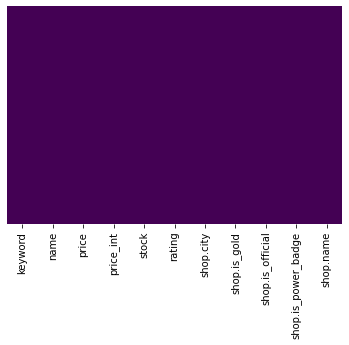

In [121]:
sns.heatmap(df_blackmores.isnull(),cbar=False,yticklabels=False,cmap='viridis')

###Mengecek Outlier

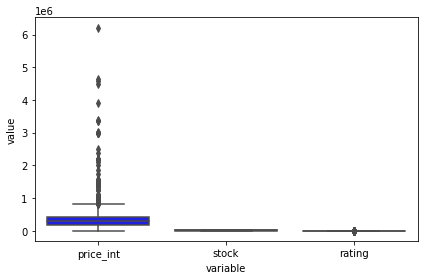

In [122]:
df_blackmores_1 = df_blackmores.select_dtypes(include=['int64'])
sns.boxplot(x="variable", y="value",color='blue',orient='v', data=pd.melt(df_blackmores_1))
plt.tight_layout()

###Melihat Korelasi Data

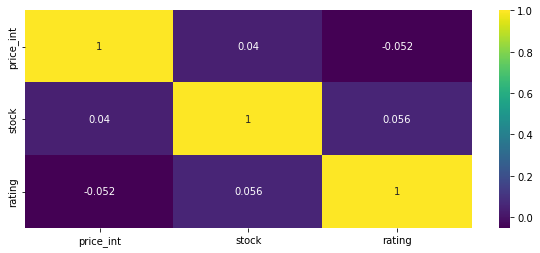

In [123]:
k = len(df_blackmores_1.columns)
cm = df_blackmores_1.corr()
plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True, cmap='viridis')

###Melihat Statistik Data

In [124]:
df_blackmores.describe()

,price_int,stock,rating
count,1.267300e+04,12673.000000,12673.000000
mean,3.210656e+05,16855.328415,0.350430
std,2.148010e+05,16306.256139,1.268199
min,2.000000e+02,-1.000000,0.000000
25%,1.750000e+05,32.000000,0.000000
50%,2.900000e+05,32767.000000,0.000000
75%,4.330000e+05,32767.000000,0.000000
max,6.217000e+06,32767.000000,5.000000


###Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



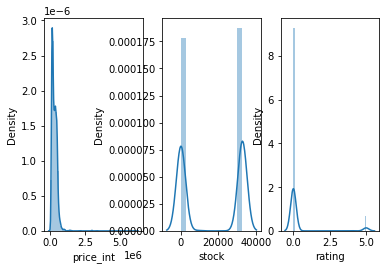

In [125]:
a = df_blackmores_1.columns.values
number_of_columns=len(df_blackmores_1.columns)
number_of_rows= len(a)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0, len(a)):
  plt.subplot(number_of_rows + 1, number_of_columns, i+1)
  sns.distplot(df_blackmores[a[i]],kde=True)

###Pairplot

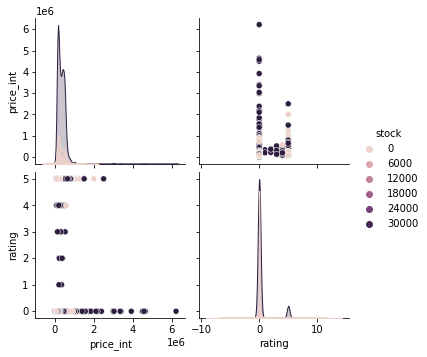

In [126]:
f = sns.pairplot(df_blackmores_1, hue="stock")

##Data Preparation

###Seleksi Kolom

In [127]:
df_blackmores=df_blackmores.drop(columns=['price','rating','shop.is_gold','shop.is_official',
                                          'shop.is_power_badge'])
df_blackmores.head()

,keyword,name,price_int,stock,shop.city,shop.name
0,BLACKMORES BIO ACE EXCELL (30),Blackmores Bio Ace Excell BPOM Kalbe - 30 Softgel,157500,32767,Jakarta,Bos Vitamin
1,BLACKMORES BIO ACE EXCELL (30),BLACKMORES BIO ACE EXCELL EXCEL KALBE VITAMIN ...,210000,32592,Jakarta,DAILY PROMOTION
2,BLACKMORES BIO ACE EXCELL (30),Blackmores Bio Ace Excell Kalbe BPOM - 30 Softgel,157500,100,Jakarta,suplemenfactory
3,BLACKMORES BIO ACE EXCELL (30),Blackmores Bio Ace Excell 30 pcs Suplemen Vita...,172600,1,Surabaya,Toko Oneway
4,BLACKMORES BIO ACE EXCELL (30),Blackmores Bio Ace Excell 30 Softgel,172500,97,Jakarta,Banda Neira Store


###Melakukan Pengkodean(Encoding)

In [128]:
df_blackmores['keyword'].value_counts()

Blackmores Vitamin C 500mg (60)                     1043
Blackmores Bio C 1000mg (150)                        894
Blackmores Pregnancy  Breastfeeding Gold (180)       862
Blackmores i-Folic (150)                             744
Blackmores Calcimag Multi (60)                       570
Blackmores Pregnancy  Breast Feeding Gold (60)       479
Blackmores Fish Oil 1000 (200)                       465
Blackmores Odourless Garlic (200)                    451
Blackmores Bio C 1000mg (30)                         441
Blackmores Lutein Vision (60)                        433
Blackmores Odourless Fish Oil 1000 (400)             431
Blackmores Coq10 75mg (30)                           419
Blackmores Multivitamins + Minerals (120)            390
Blackmores Glucosamine Sulfate 1500mg (90)           384
Blackmores Executive B (62)                          379
Blackmores Radiance Marine Q10 (30)                  365
Blackmores Echinacea Multi (60)                      342
Blackmores Pregnancy  Breast Fe

In [129]:
df_blackmores['name'].value_counts()

Blackmores Bio C 500mg Cold Relief Vitamin C BPOM Kalbe - 60 Tablet       196
Blackmores I-Folic BPOM Kalbe - 150 Tablet                                 80
Blackmores Calcimag Multi BPOM Kalbe (Kalsium Obat Tulang) - 60 tablet     63
Blackmores Glucosamine Sulfate 1500mg BPOM Kalbe - 90 Tablet               61
Blackmores Bio C 1000mg BPOM Kalbe - 150 Tablet                            60
                                                                         ... 
New I Blackmores Multivitamins Minerals BPOM Kalbe 120 tablet Laris         1
BLACKMORES MULTIVITAMINS + MINERALS (30)                                    1
ILARISl Blackmores Bio C 1000mg 150 Tablets Vitamin C                       1
HIGH QUALITY Blackmores I-Folic - Isi 150 Tablet AEBO                       1
Blackmores Bio C 1000MG 150 Diskon                                          1
Name: name, Length: 6387, dtype: int64

In [130]:
df_blackmores['shop.city'].value_counts()

Jakarta           9280
Surabaya           867
Medan              463
Kab. Bekasi        281
Bandung            257
                  ... 
Tanjung Pinang       1
Kab. Sikka           1
Kab. Serang          1
Salatiga             1
Kab. Sambas          1
Name: shop.city, Length: 73, dtype: int64

In [131]:
df_blackmores.dtypes

keyword      object
name         object
price_int     int64
stock         int64
shop.city    object
shop.name    object
dtype: object

In [132]:
df_blackmores['keyword']=df_blackmores['keyword'].astype('category')
df_blackmores['name']=df_blackmores['name'].astype('category')
df_blackmores['shop.city']=df_blackmores['shop.city'].astype('category')
df_blackmores['shop.name']=df_blackmores['shop.name'].astype('category')
df_blackmores.dtypes

keyword      category
name         category
price_int       int64
stock           int64
shop.city    category
shop.name    category
dtype: object

In [133]:
df_blackmores['keyword']=df_blackmores['keyword'].cat.codes
df_blackmores['name']=df_blackmores['name'].cat.codes
df_blackmores['shop.city']=df_blackmores['shop.city'].cat.codes
df_blackmores['shop.name']=df_blackmores['shop.name'].cat.codes
df_blackmores.head()

,keyword,name,price_int,stock,shop.city,shop.name
0,0,1425,157500,32767,15,240
1,0,333,210000,32592,15,324
2,0,1443,157500,100,15,2546
3,0,1414,172600,1,67,1386
4,0,1410,172500,97,15,193


###Menghapus Outlier

In [134]:
sorted(df_blackmores)

Q1=df_blackmores.quantile(0.25)
Q3=df_blackmores.quantile(0.75)
IQR=Q3-Q1
print(IQR)

keyword          21.0
name           2315.0
price_int    258000.0
stock         32735.0
shop.city         0.0
shop.name      1366.0
dtype: float64


In [135]:
df_blackmores_clear = df_blackmores[~((df_blackmores<(Q1-1.5*IQR))|
                                                  (df_blackmores> (Q3+1.5*IQR))).any(axis=1)]
df_blackmores_clear

,keyword,name,price_int,stock,shop.city,shop.name
0,0,1425,157500,32767,15,240
1,0,333,210000,32592,15,324
2,0,1443,157500,100,15,2546
4,0,1410,172500,97,15,193
8,0,1411,187500,10,15,1950
...,...,...,...,...,...,...
12666,34,3844,194000,32767,15,2155
12667,34,1199,202000,56,15,1517
12669,34,6051,162500,32767,15,1973
12670,34,5391,140000,32767,15,239


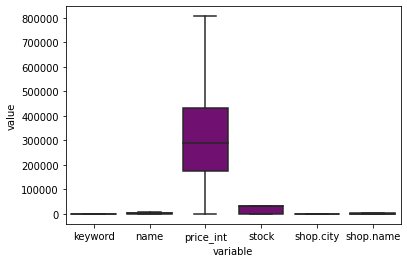

In [136]:
sns.boxplot(x="variable", y="value", color='purple', orient='v', data=pd.melt(df_blackmores_clear))

plt.show()

###Normalisasi Data

In [137]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_blackmores_norm = pd.DataFrame(scaler.fit_transform(df_blackmores_clear), columns=df_blackmores_clear.columns)

df_blackmores_norm

,keyword,name,price_int,stock,shop.city,shop.name
0,0.000000,0.223144,0.195210,1.000000,0.0,0.088257
1,0.000000,0.052145,0.260362,0.994659,0.0,0.119276
2,0.000000,0.225963,0.195210,0.003082,0.0,0.939808
3,0.000000,0.220795,0.213825,0.002991,0.0,0.070901
4,0.000000,0.220952,0.232440,0.000336,0.0,0.719719
...,...,...,...,...,...,...
9205,0.971429,0.601942,0.240506,1.000000,0.0,0.795421
9206,0.971429,0.187754,0.250434,0.001740,0.0,0.559823
9207,0.971429,0.947541,0.201415,1.000000,0.0,0.728213
9208,0.971429,0.844190,0.173492,1.000000,0.0,0.087888


###Memilih Variable Target & Variable Independent

In [138]:
y=df_blackmores_norm['stock']
x=df_blackmores_norm.drop(columns=['stock'])

y=np.array(y)
x=np.array(x)

print(y)
print(x)

[1.         0.99465942 0.00308228 ... 1.         1.         1.        ]
[[0.         0.22314438 0.19520973 0.         0.08825702]
 [0.         0.05214532 0.26036237 0.         0.11927622]
 [0.         0.22596304 0.19520973 0.         0.93980798]
 ...
 [0.97142857 0.9475415  0.20141474 0.         0.7282127 ]
 [0.97142857 0.84419042 0.17349218 0.         0.08788774]
 [0.97142857 0.62997181 0.16728717 0.         0.10450517]]


###Membagi Data Menjadi Data Training dan Data Testing

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, x_test = train_test_split(x,y)

##Data Visualization

In [140]:
df_blackmores = pd.read_csv('/content/BlackmoresTokopedia.csv')
df_blackmores.head()

,keyword,name,price,price_int,stock,rating,shop.city,shop.is_gold,shop.is_official,shop.is_power_badge,shop.name
0,BLACKMORES BIO ACE EXCELL (30),Blackmores Bio Ace Excell BPOM Kalbe - 30 Softgel,Rp 157.500,157500,32767,5,Jakarta,True,False,True,Bos Vitamin
1,BLACKMORES BIO ACE EXCELL (30),BLACKMORES BIO ACE EXCELL EXCEL KALBE VITAMIN ...,Rp 210.000,210000,32592,0,Jakarta,True,False,True,DAILY PROMOTION
2,BLACKMORES BIO ACE EXCELL (30),Blackmores Bio Ace Excell Kalbe BPOM - 30 Softgel,Rp 157.500,157500,100,5,Jakarta,True,True,True,suplemenfactory
3,BLACKMORES BIO ACE EXCELL (30),Blackmores Bio Ace Excell 30 pcs Suplemen Vita...,Rp 172.600,172600,1,0,Surabaya,True,False,True,Toko Oneway
4,BLACKMORES BIO ACE EXCELL (30),Blackmores Bio Ace Excell 30 Softgel,Rp 172.500,172500,97,5,Jakarta,True,False,True,Banda Neira Store


In [141]:
import plotly.express as px

In [143]:
fig = px.bar(df_blackmores, x='keyword', y='stock')

fig.update_layout(
    title='Stock Blackmores',
    title_font_color ='purple',
    title_font_size= 20,

    xaxis = dict(
        title ='Keyword',
        titlefont_size = 12,
        tickfont_size = 8),
    yaxis = dict(
        title = 'Stock',
        titlefont_size = 12,
        tickfont_size= 8))
fig.show()